# **Projet de Machine Learning : Qualité des vins**




## **Sujet**

Le sujet de notre projet de machine learning a été la qualité du vin. Nous avons souhaité savoir si il était possible de prédire la qualité, critère relativement subjectif, d’un vin à partir d’un certain nombre de ses caractéristiques ( ex : taux d’alcool, pH, etc.) en utilisant des techniques de machine learning.

## **Jeu de Données**

Le [jeu de données utilisé](https://www.kaggle.com/rajyellow46/wine-quality) a été trouvé sur le site Kaggle.com, celui-ci contient les données de 6497 vins blancs et rouges “Vinho Verde”, un type de vins portugais. Le jeu de données contient 13 colonnes, les 12 premières sont les caractéristiques physico-chimiques de chaque vin suivantes : 

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. type

Et la dernière colonne correspond à une note de qualité du vin entre 0 et 10 déterminée par dégustation des vins. En première observation, on peut noter que les vins notés 5 ou 6 sur 10 sont sur-représentés dans le set de données.

**Qualité des données :**

Le jeu de données comporte que peu de données manquantes, sur les 6497 vins, moins d’une trentaine comportent des trous dans leurs attributs. Ces problèmes seront traités dans le pré-traitement des données.


## **Problème**

Le premier argument pour expliquer l’utilisation de l’apprentissage automatique est la complexité du problème. En effet, notre compréhension du domaine est trop faible, nous ne sommes pas capables de corréler la composition physico-chimique du vin (facteurs objectifs) avec sa qualité sensorielle (facteur subjectif). Etant donné que nous prenons en compte des facteurs objectifs et subjectifs, il n’existe pas de modèle d’équations prenant tout en compte. Ainsi, nous faisons face à un problème complexe uniquement résolvable par l’apprentissage automatique.
Le second argument est l’utilisation de données. En effet, notre problème est basé sur l’exploitation de mesures de la composition physico-chimique du vin. Etant donné le nombre de ces mesures nous pouvons entraîner des modèles pour résoudre notre problème.

Enfin, nos données sont labellisées. A chaque vin nous pouvons faire correspondre une composition chimiques (les inputs) à une qualité (les outputs), en conséquence, nous utiliserons l’apprentissage supervisé. Pour finir, nous faisons face à un problème de classification puisque nos labels forment des classes, ce sont les entiers de 0 à 10.


# **Implémentation**

**Importation des données**



In [0]:
import pandas as pd

url = "https://raw.githubusercontent.com/magali0411/Wine-Quality/master/winequalityN.csv"
df = pd.read_csv(url)
print(df)
print(df.describe())
df.columns = ["type","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]


       type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0     white            7.0             0.270  ...       0.45      8.8        6
1     white            6.3             0.300  ...       0.49      9.5        6
2     white            8.1             0.280  ...       0.44     10.1        6
3     white            7.2             0.230  ...       0.40      9.9        6
4     white            7.2             0.230  ...       0.40      9.9        6
...     ...            ...               ...  ...        ...      ...      ...
6492    red            6.2             0.600  ...       0.58     10.5        5
6493    red            5.9             0.550  ...        NaN     11.2        6
6494    red            6.3             0.510  ...       0.75     11.0        6
6495    red            5.9             0.645  ...       0.71     10.2        5
6496    red            6.0             0.310  ...       0.66     11.0        6

[6497 rows x 13 columns]
       fixed acidity  vola

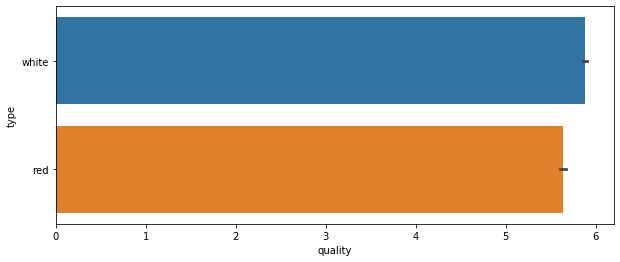

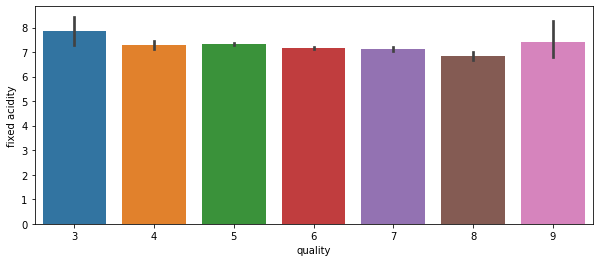

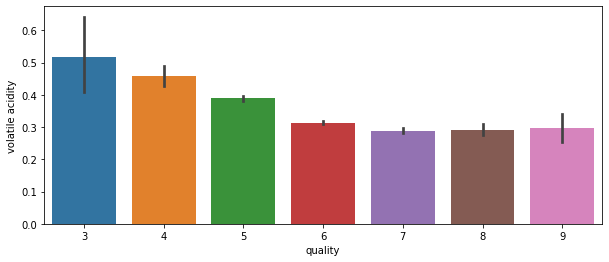

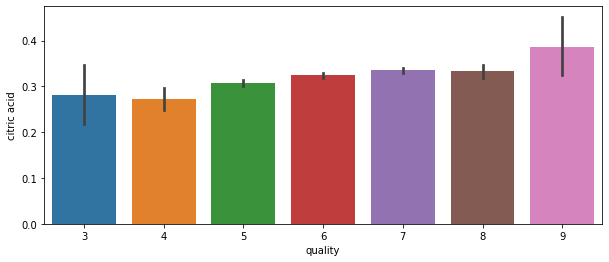

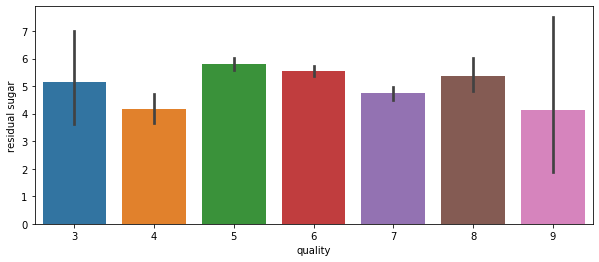

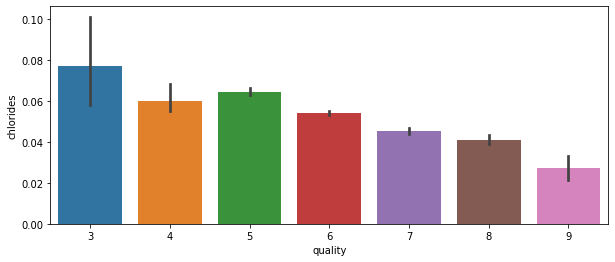

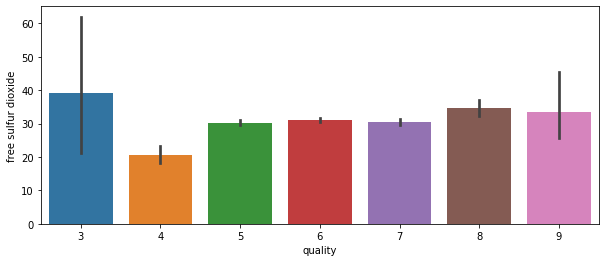

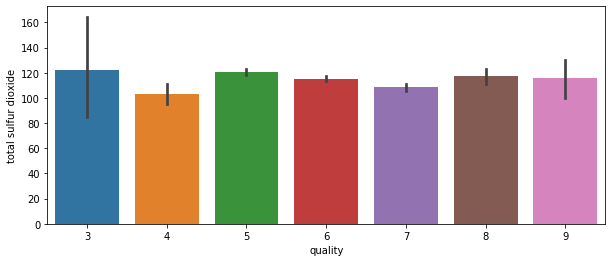

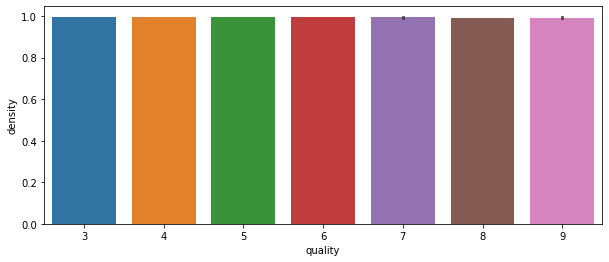

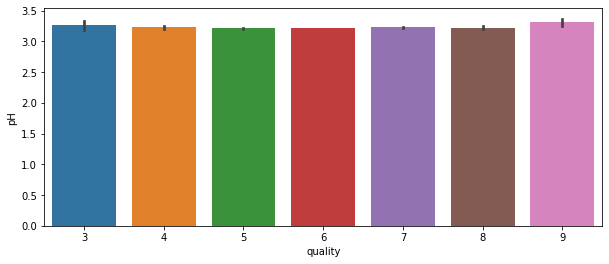

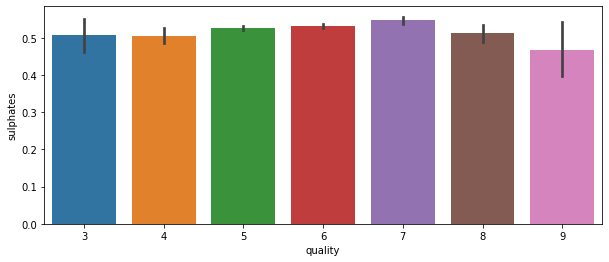

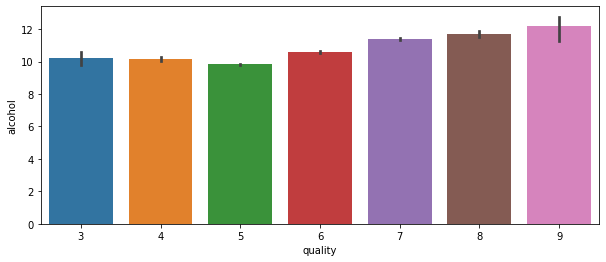

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot
for param in df.columns :
    if (param != 'quality') :
        fig = plt.figure(figsize = (10,4))
        sns.barplot(x = 'quality', y = param, data = df)

A première vue, il ne semble pas évident d'établir une corrélation entre une ou plusieurs caractéritiques physico-chimiques des vins et leur qualité, c'est pourquoi nous souhaitons employer des techniques de Machine Learning

On observe aussi que la répartition vins blancs - vins rouges est homogène dans ce jeu de données.

#### Dispertion des données

In [0]:
# Observation des données pour toutes les colonnes 
for col in df.columns :

    if col != "quality" and col != "type" :
        print("\n" + str(col))
        print("Max : ",df[col].max()," Min : ",df[col].min())


fixed acidity
Max :  15.9  Min :  3.8

volatile acidity
Max :  1.58  Min :  0.08

citric acid
Max :  1.66  Min :  0.0

residual sugar
Max :  65.8  Min :  0.6

chlorides
Max :  0.611  Min :  0.009000000000000001

free sulfur dioxide
Max :  289.0  Min :  1.0

total sulfur dioxide
Max :  440.0  Min :  6.0

density
Max :  1.03898  Min :  0.98711

pH
Max :  4.01  Min :  2.72

sulphates
Max :  2.0  Min :  0.22

alcohol
Max :  14.9  Min :  8.0


On observe que pour chaque critères, les tranches de valeurs restent ressérées, on peut donc supposer que notre jeu de données est cohérent et ne contient pas de valeurs aberrantes.

## Pré-traitements des données

Le pré-traitement des données est l'une des choses les plus importantes à faire pour obtenir de bons resultats de classification. 

Afin d'avoir un jeu de données cohérent, nous vérifions donc le type de données qu'il contient, si il y'a des données manquantes et enfin le format des données à prédire afin d'optimiser nos prédictions. 



##### Transformation des données

In [0]:
#Transformation des données continues en catégories

print(df.dtypes)

df_qual = df.copy()
df_qual.columns = ["type","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]



type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


#### Traitement des données manquantes 

In [0]:
# valeurs manquantes
for col in df_qual.columns:
    print(" Nombre de valeurs manquantes pour la colonne "+ str(col) + " : " + str(df_qual[col].isnull().sum()))

# Observation des données concernées

print("\n Données manquantes : " + str(df_qual[df_qual.isnull().any(axis=1)]) + "\n")

 Nombre de valeurs manquantes pour la colonne type : 0
 Nombre de valeurs manquantes pour la colonne fixed acidity : 10
 Nombre de valeurs manquantes pour la colonne volatile acidity : 8
 Nombre de valeurs manquantes pour la colonne citric acid : 3
 Nombre de valeurs manquantes pour la colonne residual sugar : 2
 Nombre de valeurs manquantes pour la colonne chlorides : 2
 Nombre de valeurs manquantes pour la colonne free sulfur dioxide : 0
 Nombre de valeurs manquantes pour la colonne total sulfur dioxide : 0
 Nombre de valeurs manquantes pour la colonne density : 0
 Nombre de valeurs manquantes pour la colonne pH : 9
 Nombre de valeurs manquantes pour la colonne sulphates : 4
 Nombre de valeurs manquantes pour la colonne alcohol : 0
 Nombre de valeurs manquantes pour la colonne quality : 0

 Données manquantes :        type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
17    white            NaN             0.660  ...       0.39     12.8        8
33    white      

Cela représente un total de 34 lignes, sur un jeu de données de plus de 7000 données, nous considérons que c'est négligeable. Remplacer ces données pourrait potentiellement introduire plus de biais que de les supprimer.
Nous les avons donc exclu de notre jeu de données.

In [0]:
#suppression des données manquantes*
df_qual.dropna(inplace= True)

#### Définition des nouveaux labels à prédire 

Nous avons fait le choix de séparer les vins en 2 catégories, les mauvais vins (<=6) et les bons vins (>6). Ce choix est motivé par deux critères la simplification et la distribution des données. En effet, réduire le nombre de classes nous exempte de travailler sur des stratégies multi-classes plus complexes à implémenter. C’est l’amélioration que l’on aurait fait en premier avec plus de temps. En outre, la distribution des données est très disparate.

Nous observons que l’immense majorité des vins se trouve entre 5 et 7 en qualité. Ainsi, que ce soit pour entraîner nos modèles ou les utiliser dans la pratique nous n’avons pas assez de données aux extrémités.

La séparation des données en 2 classes entraîne une disproportion entre les deux classes. En effet, il y a plus de 5000 vins dans la classe “mauvais” et donc moins de 1500 vins dans la classe “bons”. Cette disproportion ajoute potentiellement un biais dans l’entrainement de nos modèles.


In [0]:
# Transformation

bins = [0,6.1, 10]
names = ["bad","good"]

df_qual['quality'] = pd.cut(df_qual['quality'], bins, labels=names)
#print(df_qual['quality'])

# Nombre de de vins "bons" et "mauvais" :
bons = 0
mauvais = 0
error = 0
for val in df_qual['quality'] :
    if val == 'bad' :
        mauvais += 1
    elif val == 'good':
        bons +=1
    else :
        error +=1
print("Notre jeu de donnée contient " + str(mauvais) + " mauvais et vins, " + str(bons) + " bons vins.(Erreurs :  "+ str(error) + " )")



Notre jeu de donnée contient 5192 mauvais et vins, 1271 bons vins.(Erreurs :  0 )


##### Répartitions de la qualité de nos vins

Avant transformation

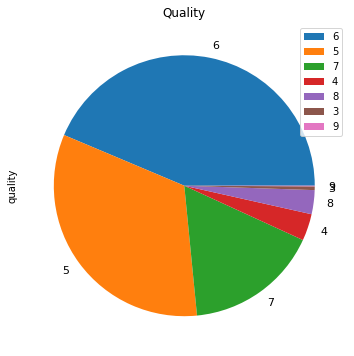

In [0]:
df['quality'].value_counts().plot(kind='pie',
figsize=(6,6),
title='Quality',
fontsize=11,
legend=True)
plt.show()

Après transformation

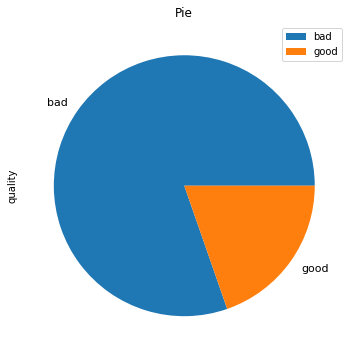

In [0]:
df_qual['quality'].value_counts().plot(kind='pie',
figsize=(6,6),
title='Pie',
fontsize=11,
legend=True)
plt.show()

Cela revient à considérer un problème de classification binaire. Dans la suite des analyses, nous allons effectuer des prédictions sur ces nouveaux labels (good & bad).
Une autre approche serait d'effectuer les prédictions sur les classes de qualités comme dans le jeu de données, et donc de concidérer une "multi-classification". 

Nous ne prendrons pas en compte la relation d’ordre qu’il existe entre nos différentes classes de départs. En effet, les classes que nous avons correspondent à des notes discrétisées. De plus, la barrière entre ces différentes notes est faible. Nous aurions pu prendre en compte cette affectation graduelle et voir l’impact qu’elle a sur nos modèles.

#### Suite des analyses

Nous avons décidé de séparer vins blancs et vins rouges. En effet, les attentes au niveau du goût de ces deux produits sont différentes. Ainsi, les critères de qualité ne sont pas les mêmes, il est non pertinent de les classer ensembles. Ce sont deux produits incomparables, tant dans leur composition que dans les attentes que l’on place en eux.

In [0]:
# Split des datasets
dfWhite = df_qual[df_qual.type == 'white']
dfWhite.reset_index(drop=True)
dfRed = df_qual[df_qual.type == 'red']
dfRed.reset_index(drop=True)

print("Nouveaux datasets : ")
print(dfRed.head())
print("___________")
print(dfWhite.head())



Nouveaux datasets : 
     type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
4898  red            7.4              0.70  ...       0.56      9.4      bad
4899  red            7.8              0.88  ...       0.68      9.8      bad
4900  red            7.8              0.76  ...       0.65      9.8      bad
4901  red           11.2              0.28  ...       0.58      9.8      bad
4902  red            7.4              0.70  ...       0.56      9.4      bad

[5 rows x 13 columns]
___________
    type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8      bad
1  white            6.3              0.30  ...       0.49      9.5      bad
2  white            8.1              0.28  ...       0.44     10.1      bad
3  white            7.2              0.23  ...       0.40      9.9      bad
4  white            7.2              0.23  ...       0.40      9.9      bad

[5 rows x 13 columns]


### Premiers tests de classification

Comme le précise le NO FREE LUNCH THEOREM il n'existe pas de classifieur universel, en fonction des données il est nécessaire d'en évaluer plusieurs pour essayer de trouver le plus efficace et adapté à notre jeu de données.

#### Méthode d'évaluation des modèles choisie : 

Pour réaliser une premier tri sur les algorithmes les plus performants sur nos données, nous avons choisi de comparer l'Accuracy des modèles.

*Accuracy = (TP + TN) / (TP + FN + TN + FP)*

TP : True positive 
TN : True negative 
TP : False positive 
FN : False negative 

Nous réaliserons des analyses plus poussés avec d'autres méthodes d'évaluation sur les modèles retenus.


In [0]:
# Suppresion des warning de Sickit learn 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Problématique d'Overfitting

Pour chacun de nos tests, nous avons entraîné nos données sur 70% du jeux de données afin d’éviter le phénomène d’"overfitting”.
Ce phénomène se traduit par un mauvais équilibre entre le biais et la variance de notre modèle. Le biais correspond aux erreurs effectués durant l'apprentissage et la variance à l’écart des valeurs prédites par notre modèle.
Le ratio biais-variance de la complexité de notre modèle est optimisée grâce à l’utilisation de la validation croisée.

Le validation croisée, ou “cross-validation” permet d'entraîner notre modèle de la manière la plus aléatoire possible sur nos données. 
Ainsi, notre modèle ne sera pas seulement adapté aux données sur lesquels il s’est entraîné. La fonction construite pourra également prédire la classification de nouvelle donnée avec suffisamment de précision. 

# Choix des Modèles 

Nous avons choisi de tester 7 modèles différents. Cet ensemble est représentatif des grandes catégories d’algorithmes de classification. Nous allons expliquer succinctement comment chaque modèle fonctionne.
* **La régression logistique** : cette méthode crée une combinaison linéaire des paramètres d’entrée. Dans le cas de la régression logistique, la variable réponse suit une loi binomiale car nous faisons face à plusieurs vins.
* **Les arbres de décision** : l’arbre est créé en prenant une variable d’entrée la plus révélatrice possible des classes de sortie. C’est une méthode récursive sur les feuilles suivantes de l’arbre. Quand on utilise cet algorithme, la nouvelle valeur d’entrée descend l’arbre en utilisant ses paramètres jusqu’à être attribuée à une classe.
* **La classification naïve bayésienne** : c’est un type de classification bayésienne probabiliste simple basée sur le théorème de Bayes avec une forte indépendance des hypothèses
* **Les K plus proches voisins** : pour traiter une nouvelle entrée x, cette méthode lui attribue k entrées les plus proches selon une distance à définir. Ensuite, il détermine quelle classe est la plus représentée parmi les k sorties associées au k entrées voisines.
* **Une machine à vecteurs de support (SVC pour les classifieurs):** cette méthode consiste à séparer les classes par un hyperplan. Le plus performant des hyperplans possibles est celui qui maximise la marge entre celui-ci et les échantillons. Ainsi, cette méthode s’attèle à trouver cet hyperplan.
* **La forêt d’arbres décisionnels :** cet algorithme a pour objectif de palier à plusieurs inconvénients de l’apprentissage par arbre de décision. Le principe est simple, créer plusieurs arbres de décision sur une partition de notre jeu de données. Pour tester une nouvelle entrée il suffit de tester pour tous les arbres et de prendre la classe sortant le plus souvent.
* **Le renforcement du gradient :** cette méthode optimise une fonction de coût en utilisant le gradient négatif. Elle fonctionne par itération, à chacune d’elle elle essaie de corriger l’erreur produite précédemment.


#### Sur le vin blanc

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


LR: 0.800821 (0.038928)
KNN: 0.747639 (0.037711)
CART: 0.740862 (0.043721)
NB: 0.725051 (0.061289)
SVM: 0.769199 (0.039977)
SGD: 0.775359 (0.056513)
RF: 0.810472 (0.042955)
GBC: 0.801848 (0.037776)


[Text(0, 0, 'LR'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'SGD'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'GBC')]

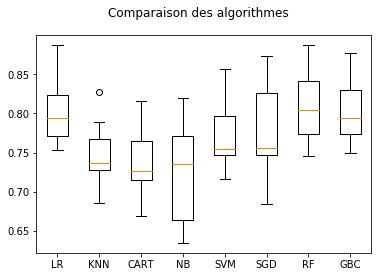

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Split des données
dfWhite.drop(columns='type', inplace = True)

#df_qual = df_qual.reset_index()


#print(dfWhite.head())

array = dfWhite.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)

# Utilisation de plusieurs modèles 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('SGD',SGDClassifier(penalty=None)))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC',GradientBoostingClassifier()))

# Evaluation des modèles sur nos données
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Graphe de comparaisons
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

*Légende* : La barre orange correspond à l'Accuracy et les boîtes représentent les écart-types

#### Sur le vin rouge

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


LR: 0.874458 (0.062050)
KNN: 0.849316 (0.074055)
CART: 0.821014 (0.082919)
NB: 0.851808 (0.072063)
SVM: 0.858722 (0.084028)
RF: 0.876297 (0.073083)
GBC: 0.874403 (0.070998)


[Text(0, 0, 'LR'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'GBC')]

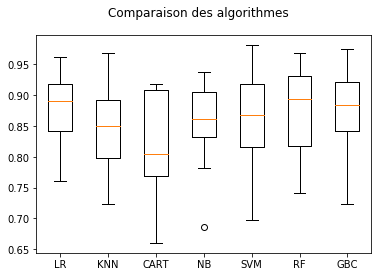

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dfRed.drop(columns='type', inplace = True)

array = dfRed.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)


# Utilisation de plusieurs modèles algo

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=100000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC',GradientBoostingClassifier()))

# Evaluation des modèles sur nos données
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

*Légende* : La barre orange correspond à l'Accuracy et les boîtes représentent les écart-types

#### Analyse 

On remarque que les classifieurs les plus efficaces (sans établir de paramètres) pour effectuer la classification des vins sont les suivants (classification binaire):

- Logistic Regression
- Random Forest
- Gradient Boosting Classifier

Dans la suite de l'analyse, nous allons donc essayer d'optimiser les hyper-paramètres et d'analyser les résultats de ces 3 algorithmes. 

Pour cela, nous allons evaluer nos modèles à partir de l'accuracy, de la matrice de confusion, du F1 score, de la précision et du recall ( les formules de ces différents indicateurs sont reprises du cours de machine learning).


## Logistic Regression

Analyse des résultats du modèle sur nos jeux de données

In [0]:
clf = LogisticRegression(solver='lbfgs', max_iter=1000000)

print("------" + " vin rouge " + "------")


#df_qual = df_qual.reset_index()
array = dfRed.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)

model.fit(X_train, y_train)
result = model.predict(X_test)
print('\nAccuracy : ', accuracy_score(y_test, result))
print ('\n',classification_report(y_test, result))
conf = confusion_matrix(y_test,result)
print ('\n matrice de confusion \n',conf)


print("\n------" + " vin blanc " + "------")


#print(dfWhite.head())

array = dfWhite.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)

model.fit(X_train, y_train)
result = model.predict(X_test)
print('\nAccuracy : ', accuracy_score(y_test, result))
print ('\n',classification_report(y_test, result))
conf = confusion_matrix(y_test,result)
print ('\n matrice de confusion \n',conf)




------ vin rouge ------

Accuracy :  0.897489539748954

               precision    recall  f1-score   support

         bad       0.91      0.98      0.94       410
        good       0.77      0.40      0.52        68

    accuracy                           0.90       478
   macro avg       0.84      0.69      0.73       478
weighted avg       0.89      0.90      0.88       478


 matrice de confusion 
 [[402   8]
 [ 41  27]]

------ vin blanc ------

Accuracy :  0.8357289527720739

               precision    recall  f1-score   support

         bad       0.86      0.94      0.90      1150
        good       0.67      0.45      0.54       311

    accuracy                           0.84      1461
   macro avg       0.77      0.70      0.72      1461
weighted avg       0.82      0.84      0.82      1461


 matrice de confusion 
 [[1081   69]
 [ 171  140]]


### Détermination des meilleurs hyper-paramètres

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

print("------" + " vin rouge " + "------")

#df_qual = df_qual.reset_index()
array = dfRed.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)

grid_param = {
'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000],# Inverse de la force de régularisation (diminue les risques d'overfitting)
'penalty':["l1","l2"] #Type de pénalité appliqué Lasso L1 vs Ridge L2 (voir documentation sklearn)
}


gd_sr = GridSearchCV(estimator=clf,
    param_grid=grid_param,
    scoring='accuracy',
    cv=5,
    n_jobs=1,
    iid=True,
    return_train_score=True)

gd_sr.fit(X_train, y_train)
print ('meilleur score ',gd_sr.best_score_,'\n')
print('meilleurs hyper-paramètres', gd_sr.best_params_, '\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

print("------" + " vin blanc " + "------")


array = dfWhite.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)

gd_sr = GridSearchCV(estimator=clf,
    param_grid=grid_param,
    scoring='accuracy',
    cv=5,
    n_jobs=1,
    iid=True,
    return_train_score=True)

gd_sr.fit(X_train, y_train)
print ('meilleur score ',gd_sr.best_score_,'\n')
print('meilleurs hyper-paramètres', gd_sr.best_params_, '\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')



------ vin rouge ------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

meilleur score  0.8860986547085202 

meilleurs hyper-paramètres {'C': 100, 'penalty': 'l2'} 

meilleur estimateur LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

------ vin blanc ------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

meilleur score  0.8063948371956585 

meilleurs hyper-paramètres {'C': 0.1, 'penalty': 'l2'} 

meilleur estimateur LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



Test du modèle paramétré avec k-fold

In [0]:
print("------" + " vin rouge " + "------")

clf = LogisticRegression(C= 100, penalty= 'l2',max_iter=1000) #meilleurs hyper-paramètres

array = dfRed.values
X = array[:,1:11]
y = array[:,11]

k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
scoring = 'accuracy'
result = cross_val_score(clf, X, y, cv=k_fold, scoring=scoring)

print("accuracy moyenne : " + str(result.mean()))

print("------" + " vin blanc " + "------")

clf = LogisticRegression(C= 0.1, penalty= 'l2', max_iter=1000)

array = dfWhite.values
X = array[:,1:11]
y = array[:,11]

result = cross_val_score(clf, X, y, cv=k_fold, scoring=scoring)

print("accuracy moyenne : " + str(result.mean()))

# Et voilà, on peut sauvergarder notre modèle pour l'utiliser sur de nouvelles données!


------ vin rouge ------
accuracy moyenne : 0.8800825471698113
------ vin blanc ------
accuracy moyenne : 0.8049281314168379


## Gradient Boosting Classifier


In [0]:
clf = GradientBoostingClassifier()

print("------" + " vin rouge " + "------")


#df_qual = df_qual.reset_index()
array = dfRed.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)


model.fit(X_train, y_train)
result = model.predict(X_test)
print('\nAccuracy : ', accuracy_score(y_test, result))
print ('\n',classification_report(y_test, result))
conf = confusion_matrix(y_test,result)
print ('\n matrice de confusion \n',conf)


print("\n------" + " vin blanc " + "------")



#print(dfWhite.head())

array = dfWhite.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)

model.fit(X_train, y_train)
result = model.predict(X_test)
print('\nAccuracy : ', accuracy_score(y_test, result))
print ('\n',classification_report(y_test, result))
conf = confusion_matrix(y_test,result)
print ('\n matrice de confusion \n',conf)


------ vin rouge ------

Accuracy :  0.895397489539749

               precision    recall  f1-score   support

         bad       0.92      0.96      0.94       412
        good       0.67      0.47      0.55        66

    accuracy                           0.90       478
   macro avg       0.80      0.72      0.75       478
weighted avg       0.89      0.90      0.89       478


 matrice de confusion 
 [[397  15]
 [ 35  31]]

------ vin blanc ------

Accuracy :  0.8295687885010267

               precision    recall  f1-score   support

         bad       0.85      0.94      0.90      1142
        good       0.68      0.42      0.52       319

    accuracy                           0.83      1461
   macro avg       0.77      0.68      0.71      1461
weighted avg       0.81      0.83      0.81      1461


 matrice de confusion 
 [[1079   63]
 [ 186  133]]


### GridSearch pour trouver les meilleurs hyper-paramètres



In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

print("------" + " vin rouge " + "------")

array = dfRed.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)

grid_param = {
'learning_rate':[0.1, 0.05, 0.02, 0.01], #Quantité de changement entre chaque arbre à chaque itérations(changement de chaques valeurs prédites) 
'min_samples_split':[100,500,1000], #Le nombre minimal d'observation pour être 'éclaté' à la prochaine itération
'min_samples_leaf':[20, 50,100,150], #Le nombre minimal d'observation pour être concidéré comme un arbre ou en noeud
'max_depth':[4,8,16], #Profondeur d'un arbre
'max_features': [1.0, 0.3, 0.1], #Le nombre feature pris en compte 
'random_state':[10] #seed 
}


gd_sr = GridSearchCV(estimator=clf,
    param_grid=grid_param,
    scoring=scoring,
    cv=2,
    n_jobs=10,
    verbose=3)

gd_sr.fit(X_train, y_train)
print ('meilleur score ',gd_sr.best_score_,'\n')
print('meilleurs hyper-paramètres', gd_sr.best_params_, '\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')


print("------" + " vin blanc " + "------")

array = dfWhite.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)

gd_sr = GridSearchCV(estimator=clf,
    param_grid=grid_param,
    scoring=scoring,
    cv=2,
    n_jobs=10,
    verbose=3)

gd_sr.fit(X_train, y_train)
print ('meilleur score ',gd_sr.best_score_,'\n')
print('meilleurs hyper-paramètres', gd_sr.best_params_, '\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')


------ vin rouge ------
Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   12.5s
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:   22.1s
[Parallel(n_jobs=10)]: Done 492 tasks      | elapsed:   35.8s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   53.8s
[Parallel(n_jobs=10)]: Done 864 out of 864 | elapsed:   58.5s finished


meilleur score  0.8905828716305348 

meilleurs hyper-paramètres {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 20, 'min_samples_split': 100, 'random_state': 10} 

meilleur estimateur GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

------ vin blanc ------
Fitting 2 folds for each of 432 candidates, totalling 864 f

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    4.8s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   24.8s
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:   57.3s
[Parallel(n_jobs=10)]: Done 492 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 864 out of 864 | elapsed:  2.9min finished


meilleur score  0.8351417399804497 

meilleurs hyper-paramètres {'learning_rate': 0.1, 'max_depth': 16, 'max_features': 0.3, 'min_samples_leaf': 20, 'min_samples_split': 100, 'random_state': 10} 

meilleur estimateur GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=16,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



### Test du modèle avec k-flod

In [0]:
print("------" + " vin rouge " + "------")

clf = GradientBoostingClassifier(learning_rate= 0.1, max_depth = 8, max_features= 0.1, min_samples_leaf= 20, min_samples_split= 100, random_state= 10)

array = dfRed.values
X = array[:,1:11]
y = array[:,11]

result = cross_val_score(clf, X, y, cv=k_fold, scoring=scoring)

print("accuracy moyenne : " + str(result.mean()))

print("------" + " vin blanc " + "------")

clf = GradientBoostingClassifier(learning_rate= 0.1, max_depth = 16, max_features= 0.3, min_samples_leaf= 20, min_samples_split= 100, random_state= 10)

array = dfWhite.values
X = array[:,1:11]
y = array[:,11]


result = cross_val_score(clf, X, y, cv=k_fold, scoring=scoring)

print("accuracy moyenne : " + str(result.mean()))


------ vin rouge ------
accuracy moyenne : 0.9020597484276729
------ vin blanc ------
accuracy moyenne : 0.8796714579055441


## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees

clf = RandomForestClassifier()


print("------" + " vin rouge " + "------")


array = dfRed.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)


model.fit(X_train, y_train)
result = model.predict(X_test)
print('\nAccuracy : ', accuracy_score(y_test, result))
print ('\n',classification_report(y_test, result))
conf = confusion_matrix(y_test,result)
print ('\n matrice de confusion \n',conf)


print("\n------" + " vin blanc " + "------")



array = dfWhite.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)

model.fit(X_train, y_train)
result = model.predict(X_test)
print('\nAccuracy : ', accuracy_score(y_test, result))
print ('\n',classification_report(y_test, result))
conf = confusion_matrix(y_test,result)
print ('\n matrice de confusion \n',conf)


------ vin rouge ------

Accuracy :  0.9079497907949791

               precision    recall  f1-score   support

         bad       0.92      0.98      0.95       417
        good       0.73      0.44      0.55        61

    accuracy                           0.91       478
   macro avg       0.83      0.71      0.75       478
weighted avg       0.90      0.91      0.90       478


 matrice de confusion 
 [[407  10]
 [ 34  27]]

------ vin blanc ------

Accuracy :  0.8425735797399042

               precision    recall  f1-score   support

         bad       0.86      0.94      0.90      1133
        good       0.72      0.49      0.58       328

    accuracy                           0.84      1461
   macro avg       0.79      0.72      0.74      1461
weighted avg       0.83      0.84      0.83      1461


 matrice de confusion 
 [[1070   63]
 [ 167  161]]


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

print("------" + " vin rouge " + "------")


array = dfRed.values
X = array[:,1:11]
y = array[:,11]

validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)

grid_param = {
    "n_estimators": [100, 250, 500,1000,2000], #Nombre d'arbres de décision dans la forêt
    "max_features": ['auto', 'sqrt'], #Le nombre maximal concidéré avant de diviser un noeud
    "max_depth": [5,8,15,30,50], #Profondeur maximale des arbres
    "min_samples_leaf" : [1, 2, 4], # Le minimum de données nécéssaires pour créer un noeud de décision
    "min_samples_split": [2, 5, 10], # Le minimum de données nécéssaire pour diviser un noeud  
}

print(X_train)
print(y_train)

gd_sr = GridSearchCV(estimator=clf,
    param_grid=grid_param,
    scoring=scoring,
    cv=2,
    n_jobs=10,
    verbose=3)

gd_sr.fit(X_train, y_train)
print ('meilleur score ',gd_sr.best_score_,'\n')
print('meilleurs hyper-paramètres', gd_sr.best_params_, '\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')



print("------" + " vin blanc " + "------")
array = dfWhite.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)

gd_sr = GridSearchCV(estimator=clf,
    param_grid=grid_param,
    scoring=scoring,
    cv=2,
    n_jobs=10,
    verbose=3)

gd_sr.fit(X_train, y_train)
print ('meilleur score ',gd_sr.best_score_,'\n')
print('meilleurs hyper-paramètres', gd_sr.best_params_, '\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

------ vin rouge ------
[[0.92 0.24 2.6 ... 3.48 0.54 9.8]
 [0.38 0.48 2.6 ... 3.32 0.7 9.6]
 [0.48 0.08 1.8 ... 3.12 0.49 9.6]
 ...
 [0.31 0.32 1.9 ... 3.41 0.56 12.6]
 [0.41 0.42 2.4 ... 3.19 0.62 9.5]
 [0.36 0.24 2.2 ... 3.57 0.57 11.7]]
['bad' 'bad' 'bad' ... 'bad' 'bad' 'bad']
Fitting 2 folds for each of 450 candidates, totalling 900 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   12.4s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.2min


### Test du modèle avec k-flod

In [0]:
print("------" + " vin rouge " + "------")

clf=RandomForestClassifier(max_depth= 5, max_features = "sqrt", min_samples_leaf= 1, min_samples_split= 5, n_estimators = 500)


array = dfRed.values
X = array[:,1:11]
y = array[:,11]

result = cross_val_score(clf, X, y, cv=k_fold, scoring=scoring)

print("accuracy moyenne : " + str(result.mean()))

print("------" + " vin blanc " + "------")

array = dfWhite.values
X = array[:,1:11]
y = array[:,11]

clf=RandomForestClassifier(max_depth= 8, max_features = "auto", min_samples_leaf= 2, min_samples_split= 2, n_estimators = 500)

result = cross_val_score(clf, X, y, cv=k_fold, scoring=scoring)

print("accuracy moyenne : " + str(result.mean()))


# **Résultats Obtenus**

Comme on peut le voir dans dans l’évaluation des modèles, nos modèles de machine learning sont beaucoup plus fiables sur les mauvais vins que sur les bons (La precision, l’accuracy, le recall et le f1-score sont nettement supérieurs pour les bons vins).
Les matrices de confusion obtenues montrent également que le taux TP : True positif (donc les bons vins classifiés) est à peine plus important que les taux d’erreurs pour les vins mal-classifiés FP et FN (False positive et False négative). 

On peut donc seulement dire que notre modèle est bon pour classifier les mauvais vins. On peut supposer que cela vient du fait que notre dataset contient peu de bons vins et beaucoup de mauvais. De ce fait, notre modèle a été bien plus entrainé pour prédire des mauvais vins que les bons. 


### Discussion autour de la symétrie des classes et des modèles

In [0]:
print("------" + " vin rouge " + "------")

# Création de deux dataframe
dfRed_good = dfRed[dfRed.quality == 'good'] 
dfRed_good.reset_index(drop=True, inplace=True)
print("Taille du jeu de données des bons vins : " + str(dfRed_good.shape[0]))


dfRed_bad = dfRed[dfRed.quality == 'bad']
dfRed_bad.reset_index(drop=True, inplace=True)
dfRed_bad_low = dfRed_bad.drop(dfRed_bad.tail(1200).index) # On supprime des vins du dataframe
print("Taille du jeu de données des mauvais vins : " + str(dfRed_bad_low.shape[0]))

# Renommage des colonnes des dataframes
dfRed_bad_low.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
dfRed_good.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

# Création du nouveau dataframe
frames =[dfRed_good,dfRed_bad_low]
new_df = pd.DataFrame()
new_df = pd.concat(frames)
new_df.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
new_df = new_df.sample(frac=1).reset_index(drop=True) # Shuffle


print("Affichage du nouveau dataframe \n") 
print(new_df.columns)
print(new_df.head)


# Test d'un algorithme sur nos données
clf = rf_param_vinR # On reprend notre algorithme randomforest avec les meilleurs hyper-paramètres

new_df.dropna


array = new_df.values
X = array[:,1:11]
y = array[:,11]
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = testsize)


model.fit(X_train, y_train)
result = model.predict(X_test)
print('\nAccuracy : ', accuracy_score(y_test, result))
print ('\n',classification_report(y_test, result))
conf = confusion_matrix(y_test,result)
print ('\n matrice de confusion \n',conf)

Nous avons essayé de palier à notre asymétrie des classes en effectuant une stratégie de sous-échantillonnage sur les mauvais vins. En effet, nous avons diminué la proportion de mauvais vins dans notre jeu de tests de manière à rééquilibrer le jeu de données. Cette méthode à pour principal risque de supprimer des entrées importantes de la classe majoritaire. Étant donné les résultats probants de cette répartition il existe deux possibilités soit nous avons eu de la chance, soit nos entrées sont assez homogènes pour que certaines ne prennent pas le pas sur d'autres.

Nous avons même choisi d'inverser la tendance en ayant plus de bons vins dans notre jeu de données que de mauvais. Cette idée vient d'une volonté métier car nous préférons qu'un mauvais vin soit considéré comme bon. En effet, l'inverse engendre plus de pertes d'argent dans une optique de choix des prix du vin selon sa qualité.

Nous n'avons pas effectué une stratégie de sur-échantillonnage car nous faisons face à une asymétrie relative des données. Les entrées de bons vins ne sont pas rares dans l'absolu mais seulement moins nombreuses que les entrées de mauvais vins. Ainsi, sur-échantillonner n'a pas d'intérêt, nous risquerions trop de sur-entraîner notre modèle ou de le complexifier plus que nécessaire.

La bonne performance de algorithme de boosting sur notre jeu de données peut être expliqué par sa correction naturelle de l'asymétrie. De plus, l'asymétrie a un fort impact sur le modèle d'arbre de décision, c'est une des raisons pour lesquelles il n'a pas été le plus performant sur notre jeu de données. Cette défaillance est en partie corrigée par la multiplication du nombre d'arbres dans l'algorithme de forêt aléatoire.

# Mise à l'échelle des valeurs attributs (Feature scaling)
La mise à l'échelle des valeurs des attributs (Feature scaling) est une méthode qui est utilisée pour
normaliser les tailles des valeurs des attributs. Elle est aussi appelée normalisation (ou standardisation) et
constitue une étape très importante dans le pré-traitement des données notamment lorsque des distances
sont utilisées. C'est le cas par exemple pour KNN, SVM, Regression, ... mais également pour des
méthodes de réduction de dimensions comme PCA et même en apprentissage non supervisée (K-Means).
La normalisation est, bien entendu, effectuée attribut par attribut dans le cas où plusieurs attributs doivent
être mis à l'échelle.

**Dans notre cas, les trois modèles que nous utilisons : Logistic Regression, Random Forest et Gradient Boosting Classifier n'utilisent pas l'évaluation des distances pour fonctionner, nous n'avons donc pas utilisé de méthode de mis à l'échelle (normalisation, standardisation ...) en pré-traitement de nos données.**

# **Conclusion**

Pour conclure, il n’existe pas de bons ou mauvais classifieurs. Chaque problème de Machine learning possède différentes approches qui peuvent être abordées de manières différentes.

Pour classifier les vins selon leurs caractéristiques, nous proposons de les catégoriser en deux classes : les bons et les mauvais. Les accuracy finales des trois modèles retenus sont les suivantes ( celles-ci peuvent varier d'un apprentissage à l'autre ) :

Accuracy :
* Logistic Regression : 0.88 ( vin blanc ), 0.80 ( vin rouge )
* Gradient Boosting : 0.90 ( vin blanc ), 0.87 ( vin rouge )
* Random Forest : 0.88 ( vin blanc ), 0.84 ( vin rouge )

Au vu des accuracy de prédiction des trois algorithmes après k-fold validation, on ne peut distinguer un algorithme nettement supérieur aux deux autres étant donné les écarts obtenus. Les trois modèles sélectionnées produisent des résultats satisfaisants selon nos critères d’évaluation et très proches les uns des autres.

Mais encore une fois, le modèle que nous avons créé est loin d’être l’unique solution pour classer les vins et il serait d’ailleurs intéressant d’imaginer d’autres classifications.

Par exemple, l'asymétrie des classes joue fortement sur l'efficacité du modèle choisi. Il existe en effet des algorithmes tenant compte de l'asymétrie et donc plus performants sur de telles données (les classifieurs ensemblistes par exemple).
Mais il serait également possible de travailler sur les données en essayant de plus amples stratégies d'échantillonnage, cela permettrait de garder notre diversité d'algorithmes.

De plus, la limite entres les bons et mauvais est fixée à 6 mais ce choix est totalement arbitraire. Nous aurions pu placer la barre à 4 ou encore essayer de prédire trois, quatre, dix... classes différentes.
On peut aussi essayer de réduire le nombre de caractéristiques prises en compte...

Finalement, ces derniers cas amènent d’ailleurs à un problème de machine learning multi-classes et donc, à une toute autre approche algorithmique. 





________________________________________________________________________________
Ce notebook est inspiré des TPs dispensés à la faculté des Sciences de Montpellier par Pascal Poncelet durant l'année 2018/2019.
Nous nous sommes également aidés de divers sites web et forums.

Le [dataset utilisé](https://www.kaggle.com/rajyellow46/wine-quality) provient du site Kaggle.com

_Travail réalisé par : Arhainx Magali - Chevassut Jules - Torck Arthur_
